In [13]:
import pandas as pd
import ast

# # this notebook code cell converts the MapReduce output from a text file to a dataframe object

filePath = 'Final_results/final_output.txt'

# Prepare lists to store data
generations = []
avgHp = []
avgAtt = []
avgDef = []
avgSatt = []
avgSdef = []
avgSpd = []
avgStatTotal = []

# Read the file and process each line
with open(filePath, 'r') as file:
    for line in file:
        line = line.strip()

        if line:
            gen, stats = line.split('\t')
            gen = int(gen) 
            stats_list = ast.literal_eval(stats)
            
            generations.append(gen)
            avgHp.append(stats_list[0])
            avgAtt.append(stats_list[1])
            avgDef.append(stats_list[2])
            avgSatt.append(stats_list[3])
            avgSdef.append(stats_list[4])
            avgSpd.append(stats_list[5])
            avgStatTotal.append(stats_list[6])

# Create a DataFrame
df = pd.DataFrame({
    'Generation': generations,
    'Avg. HP': avgHp,
    'Avg. Att': avgAtt,
    'Avg. Def': avgDef,
    'Avg. S.Att': avgSatt,
    'Avg. S.Def': avgSdef,
    'Avg. Spd': avgSpd,
    'Avg. Stat Total': avgStatTotal
})

# Display the DataFrame
print(df)

   Generation    Avg. HP   Avg. Att   Avg. Def  Avg. S.Att  Avg. S.Def  \
0           1  64.039326  73.640449  68.578652   67.848315   66.719101   
1           2  70.914286  68.761905  70.161905   65.085714   72.942857   
2           3  65.391304  72.463768  68.644928   67.253623   66.231884   
3           4  79.051852  85.325926  83.088889   82.029630   82.511111   
4           5  72.267123  84.575342  73.260274   72.178082   68.705479   
5           6  71.746032  79.000000  84.380952   69.968254   76.126984   
6           7  76.910891  88.594059  85.029703   81.871287   80.732673   
7           8  74.622449  83.540816  77.020408   73.306122   73.193878   

    Avg. Spd  Avg. Stat Total  
0  70.775281       411.601124  
1  61.866667       409.733333  
2  62.137681       402.123188  
3  77.059259       489.066667  
4  67.712329       438.698630  
5  63.714286       444.936508  
6  70.613861       483.752475  
7  71.887755       453.571429  


Index(['Generation', 'Avg. HP', 'Avg. Att', 'Avg. Def', 'Avg. S.Att',
       'Avg. S.Def', 'Avg. Spd'],
      dtype='object')


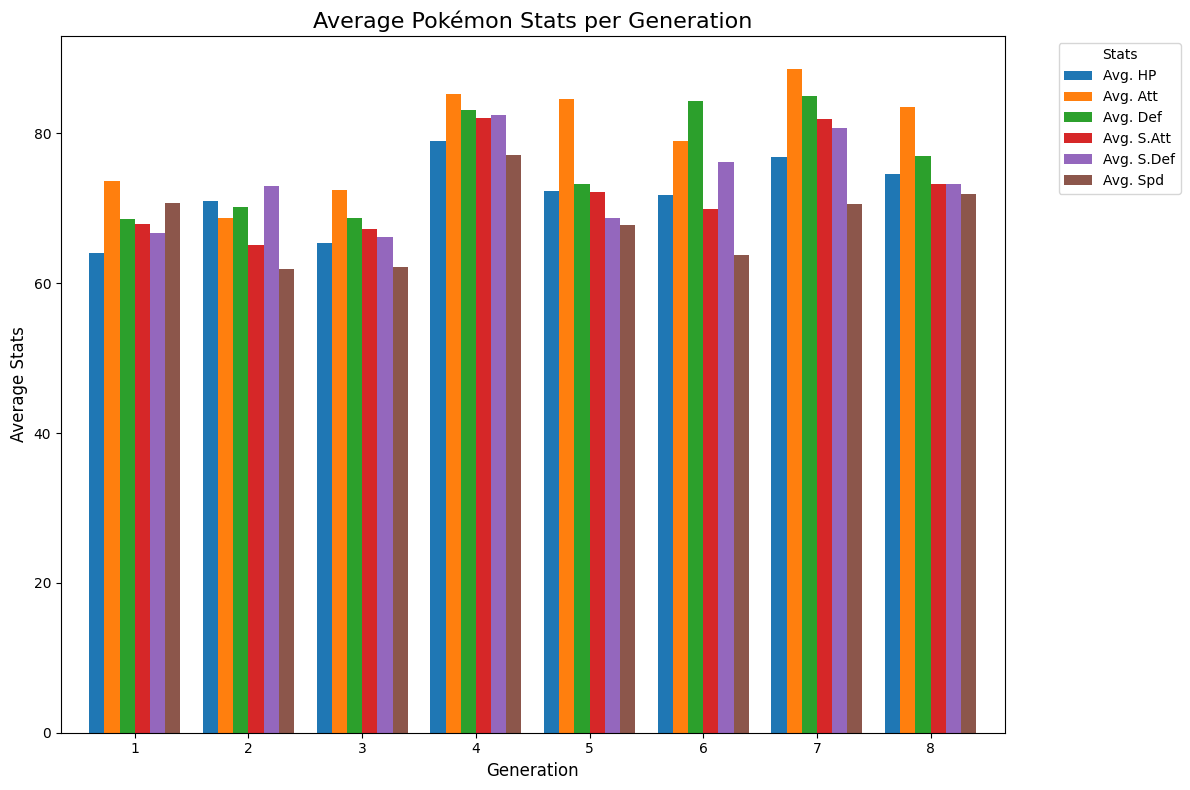

In [15]:
import matplotlib.pyplot as plt

df_no_total = df.drop(columns=['Avg. Stat Total'])
print(df_no_total.columns)

# Assuming 'df' is the DataFrame with the relevant data, as mentioned in the previous part

# Set the index of the dataframe to 'Generation' for easy plotting
df_no_total.set_index('Generation', inplace=True)

# Plotting the bar chart
ax = df_no_total.plot(kind='bar', figsize=(12, 8), width=0.8)

# Set chart title and labels
ax.set_title('Average Pokémon Stats per Generation', fontsize=16)
ax.set_xlabel('Generation', fontsize=12)
ax.set_ylabel('Average Stats', fontsize=12)

# Add legend
ax.legend(title='Stats', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Display the plot
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()

In [18]:
## training a linear regressor to predict average stat total based on generation #
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

y = df['Avg. Stat Total']
X = df[['Generation']]

model = LinearRegression()
model.fit(X, y)

yPred = model.predict(X)

r2 = r2_score(y, yPred)

print(f'Linear Regression R² value: {r2}')


Linear Regression R² value: 0.42741621061348645


C:\Users\dylan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


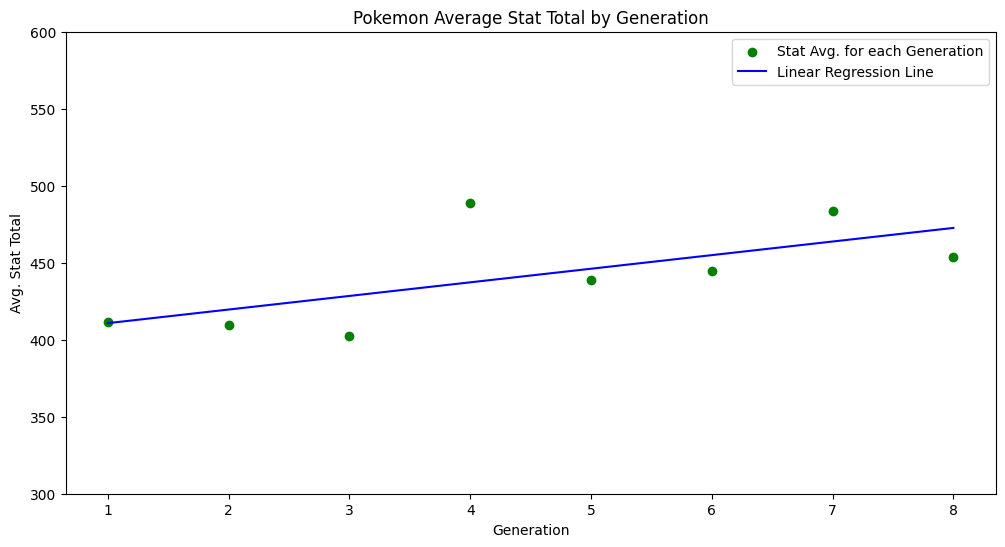

In [28]:
## visualizing the linear regression line and datapoints 
import numpy as np

plt.figure(figsize=(12, 6))

XRange = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Create a range of X values
yPred = model.predict(XRange)  # Predict y values for the range

plt.scatter(X, y, color='green', label='Stat Avg. for each Generation')
plt.ylim(300, 600)

plt.xlabel('Generation')
plt.ylabel('Avg. Stat Total')
plt.title('Pokemon Average Stat Total by Generation')

plt.plot(XRange, yPred, color='blue', label='Linear Regression Line')

plt.legend()
plt.show()